In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import requests
import json

# seaborn import suggested by DataCamp.com
import seaborn as sns
sns.set()

In [2]:
path1 = "CSV/Traffic_Crashes_-_Crashes-2018.csv"
path2 = "CSV/Traffic_Crashes_-_Vehicles-2018.csv"
path3 = "CSV/Traffic_Crashes_-_People-2018.csv"

In [3]:
people_data = pd.read_csv(path3)
people_data.head(20)

C:\Users\paull\AppData\Local\Temp\ipykernel_13344\2837139141.py:1: DtypeWarning: Columns (14,15,22,23,24,25,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  people_data = pd.read_csv(path3)


,Unnamed: 0.1,Unnamed: 0,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,0,54,P114359,PASSENGER,7e27bf3caa1b66715bfbdd9fd8525f64565dfe1caeb070...,JB492305,486598.0,10/27/2018 12:59:00 PM,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,883,P114360,PASSENGER,b119fc395ec3a3292f031e88df7e72d533bc132b2989d0...,JB492331,486601.0,10/27/2018 09:33:00 AM,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1156,P114361,PASSENGER,311f3cdd3d2c01dae8982bdff7ef886d7a0c7d6c6367db...,JB492327,486602.0,10/27/2018 01:00:00 PM,3.0,CHICAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1220,P114362,PASSENGER,5c26c628d28b279d2b8992a3b0b7eb1ad7b1d01d3d3bbb...,JB492267,486605.0,10/27/2018 01:00:00 PM,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1607,P114363,PASSENGER,5c26c628d28b279d2b8992a3b0b7eb1ad7b1d01d3d3bbb...,JB492267,486605.0,10/27/2018 01:00:00 PM,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2699,P114364,PASSENGER,98cc0c696930d3d3167eb21251a240014e7fecbff4ba1b...,JB492320,486603.0,10/27/2018 12:10:00 PM,2.0,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2736,P100000,PASSENGER,b2d13bbb52b4c664778e3468c5a8bfc6fda55377c1a98d...,JB376636,428400.0,08/02/2018 09:50:00 PM,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2737,P100001,PASSENGER,c61ea1f47e83140413a99f34bdfb1f02f467f55edfd9ae...,JB376641,428403.0,08/02/2018 09:30:00 PM,3.0,CHICAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2738,P100004,PASSENGER,3004c74285eb167f357f9c2cfa4b4d892dc82553f7005e...,JB376680,428430.0,08/02/2018 10:25:00 PM,12.0,CHICAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2739,P100005,PASSENGER,b617d3af9a04a5ca2c1ae4b505ab9f33d5748c87c20715...,JB376599,428432.0,08/02/2018 08:04:00 PM,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
people_data['SEX'].value_counts()

M    140113
F    101262
X     20726
Name: SEX, dtype: int64

In [5]:
genderdat = people_data[['SEX','INJURY_CLASSIFICATION']].copy()
genderdat = genderdat[genderdat.SEX != 'X']
genderdat = genderdat.dropna()
genderdat.head()

,SEX,INJURY_CLASSIFICATION
0,M,NO INDICATION OF INJURY
1,M,NO INDICATION OF INJURY
2,M,NO INDICATION OF INJURY
5,F,NO INDICATION OF INJURY
6,F,NO INDICATION OF INJURY


In [6]:
# Group by gender
gender_data = genderdat.groupby('SEX')
pd.set_option('display.max_columns', 48)
gender_data.describe().head()

INJURY_CLASSIFICATION                                        
                    count unique                      top    freq
SEX                                                              
F                  101250      5  NO INDICATION OF INJURY   90177
M                  140097      5  NO INDICATION OF INJURY  128853

# Visualizations

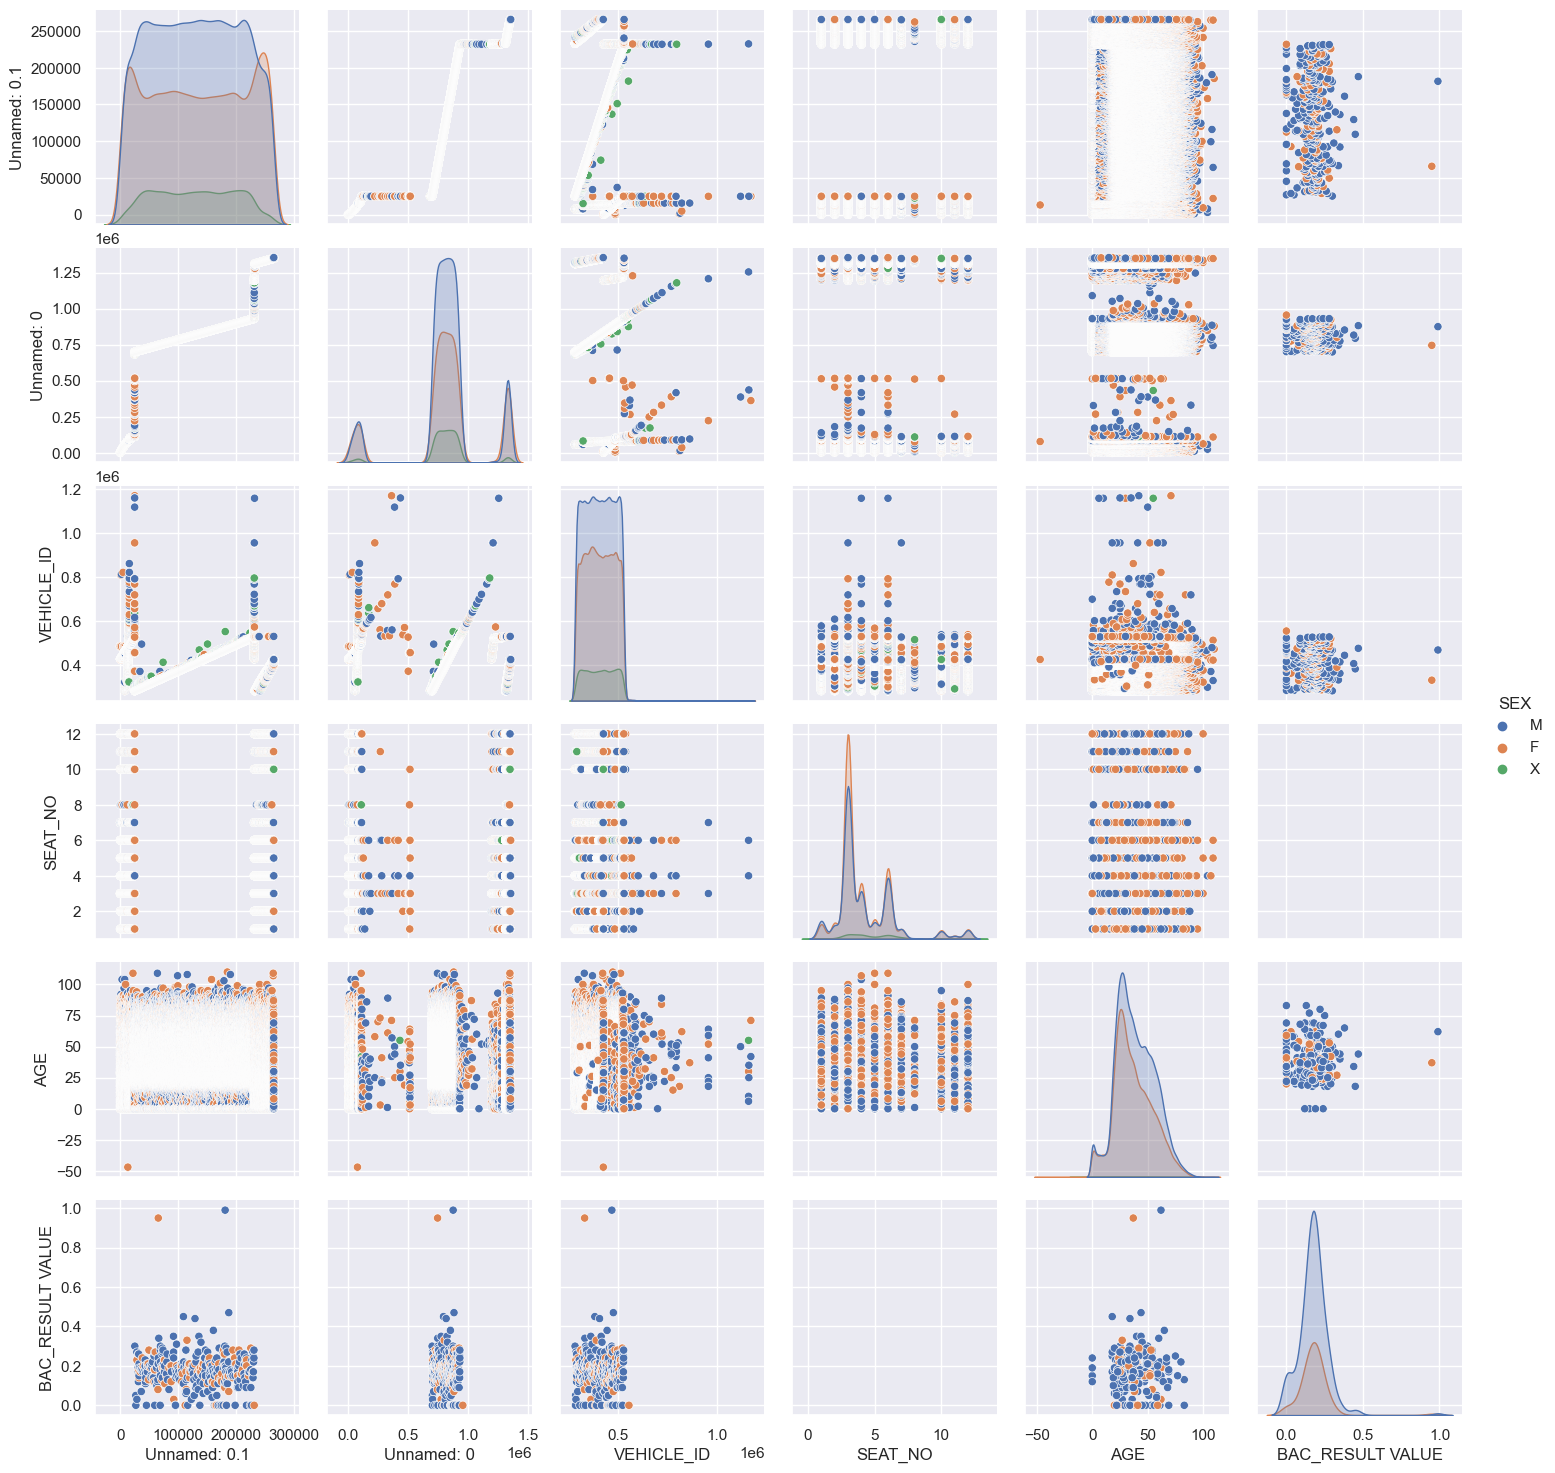

In [24]:
# Visualize pairplot of df
sns.pairplot(people_data, hue='SEX');
plt.show()

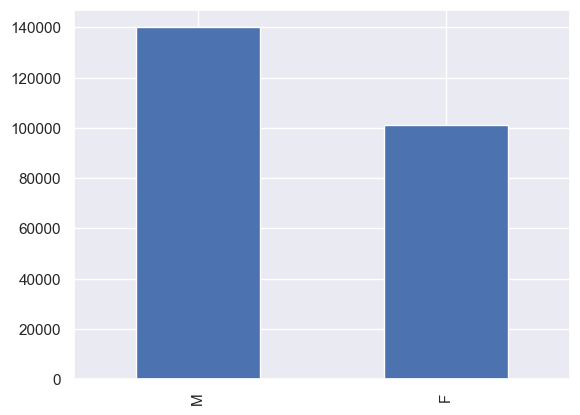

In [35]:
# Bar Chart for Total Crashes by Gender
genderdat['SEX'].value_counts().plot(kind='bar')
plt.show()

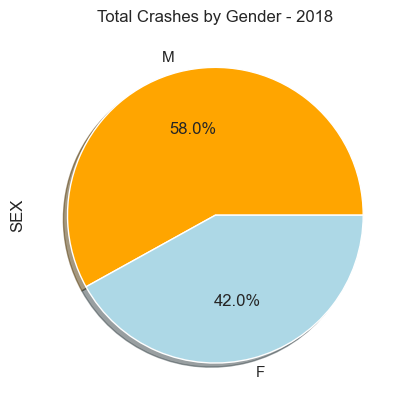

In [31]:
# Percentage of Crashes by Gender

colors=['orange', 'lightblue'] 
genderdat['SEX'].value_counts().plot(kind='pie', colors=colors,
                                     shadow=True, autopct='%1.1f%%')
plt.title('Total Crashes by Gender - 2018')
plt.show()